# Smoothing - Smoothing
Apply a smoothing filter to an image

In [1]:
import sys
import os 
import otbApplication

# List product files

In [2]:
for dirname, dirnames, filenames in os.walk('/eodata/Landsat-5/TM/L1T/2011/11/06/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727'):
    # print path to all subdirectories first.
    for subdirname in dirnames:
        print(os.path.join(dirname, subdirname))

    # print path to all filenames.
    for filename in filenames:
        print(os.path.join(dirname, filename))

    # Advanced usage:
    # editing the 'dirnames' list will stop os.walk() from recursing into there.
    if '.git' in dirnames:
        # don't go into any .git directories.
        dirnames.remove('.git')

/eodata/Landsat-5/TM/L1T/2011/11/06/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727.TIFF
/eodata/Landsat-5/TM/L1T/2011/11/06/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727.BP.PNG
/eodata/Landsat-5/TM/L1T/2011/11/06/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727.BP.XML
/eodata/Landsat-5/TM/L1T/2011/11/06/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727.JPG
/eodata/Landsat-5/TM/L1T/2011/11/06/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727.MTR.XML
/eodata/Landsat-5/TM/L1T/2011/11/06/LS0

# Processing

Smoothing is done using OTB

In [5]:
file_1 = "/eodata/Landsat-5/TM/L1T/2011/11/06/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727.TIFF/LT51880242011310ESA00_B7.TIF"

Smoothing = otbApplication.Registry.CreateApplication("Smoothing")
Smoothing.SetParameterString("in", file_1)
Smoothing.SetParameterString("out", "smoothedImage_mean.png")
Smoothing.SetParameterOutputImagePixelType("out", 1)
Smoothing.SetParameterString("type","mean")

Smoothing.ExecuteAndWriteOutput()

0

# Display using matplotlib
Output can be displayed using matplotlib  notebook.

Populating the interactive namespace from numpy and matplotlib


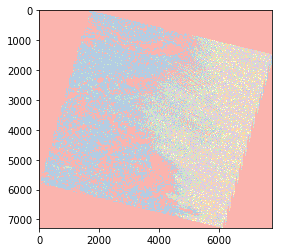

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('smoothedImage_mean.png')
imgplot = plt.imshow(img,cmap='viridis') #Set1 (quantitative)
plt.show()

# Display on map
Output can be displayed on map.

In [11]:
# 1.create layer object
a=ImageLayer() 
# 2.get product boundbox
bb=a.getbb("/eodata/Landsat-5/TM/L1T/2011/11/06/LS05_RMTI_TM__GTC_1P_20111106T091931_20111106T091959_147240_0188_0024_9727")
print(bb)
# 3.Create and show layer
a.addImageLayer('smoothedImage_mean.png',bb,"Smoothed")
a.showLayer()

[[50.694600,22.245600],[52.670600,18.888300]]
